---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

In [20]:
from IPython.display import Image
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

def imageNcaption(filename, caption):
    display(Image(filename=filename))
    print(caption)

# Tarefa 4 - Construção de histograma

Nesta tarefa será estudado o efeito que a alteração de brilho, contraste e equalização do histograma tem em uma imagem médica. Para essa tarefa será utilizada a seguinte imagem, seguida de seu respectivo histograma calculado pela função *histogram* criada neste ambiente com o próposito de receber uma imagem, retornar seu histograma e realizar a apresentação gráfica da imagem utilizada e seu histograma.

In [21]:
def histogram(img):
    N, M = img.shape
    n = N*M
    bins, hist = np.unique(img.flatten(), return_counts=True)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].stem(bins, hist, linefmt='-k', markerfmt=' ', basefmt=' ')
    ax[1].imshow(img, cmap='gray')
    #ax[1].stem(bins/n, hist/n, linefmt='-k', markerfmt='k', basefmt='')

    ax[0].set_title('Histogram')
    ax[1].set_title('Image')

    ax[0].set_xlabel('Levels')
    ax[0].set_ylabel('Counting of levels')
    
    ax[1].grid(False)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    fig.set_size_inches(10,4)

    print('Média = ' + str(img.mean()))
    print('Desvio padrão = ' + str(img.std()))
    
    return bins, hist

Segue abaixo o carregamento da imagem:

In [22]:
img = image.imread('Ressonancia 1_1minimo3.jpg')

A sua apresentação e de seu histograma seguem:

Média = 84.1605234375
Desvio padrão = 63.90846285441008


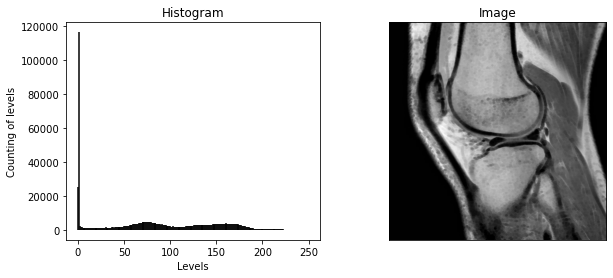

In [23]:
_, _ = histogram(img)

## Alterações de brilho

Nesta seção serão realizadas modificações no brilho da imagem original para que os efeitos sejam observados na imagem resultante e no histograma. Portanto, o primeiro passo é alterar o brilho da imagem original acrescentando 50 tons de cinza. Os resultados na imagem e histograma são:

Média = 133.9944640625
Desvio padrão = 63.56784829252046


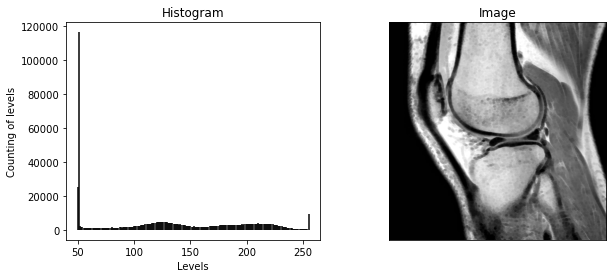

In [24]:
img_more_brightness = np.clip(img.astype(np.float32) + 50, 0, 255).astype(np.uint8) # increase brightness by 50
_, _ = histogram(img_more_brightness)

O mesmo, só que decrementando de 50 tons de cinza a imagem original:

Média = 47.4861296875
Desvio padrão = 48.78986791065775


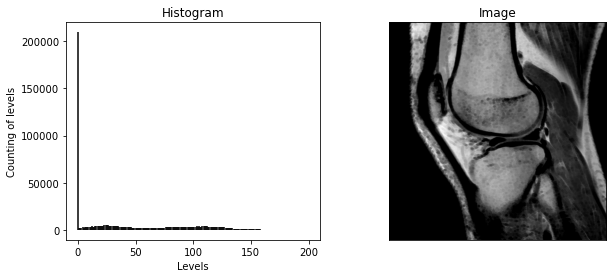

In [25]:
img_less_brightness = np.clip(img.astype(np.float32) - 50, 0, 255).astype(np.uint8) # decrease brightness by 50
_, _ = histogram(img_less_brightness)

Como esperado, ao acrescentar brilho à imagem, observa-se o deslocamento à direita do histograma, bem como o aumento das cores mais claras. Ao decrementar o brilho da imagem o efeito foi o oposto: o histograma deslocou-se a esquerda, permitindo observar o amontoamento dos tons mais escuros na região mais escura do histograma.

## Alterações de contraste

Nesta seção serão realizadas modificações no contraste da imagem original para que os efeitos sejam observados na imagem resultante e no histograma. Portanto, o primeiro passo é alterar o contraste da imagem original em 20% a mais. Os resultados na imagem e histograma são:

Média = 116.3415609375
Desvio padrão = 87.49231953899425


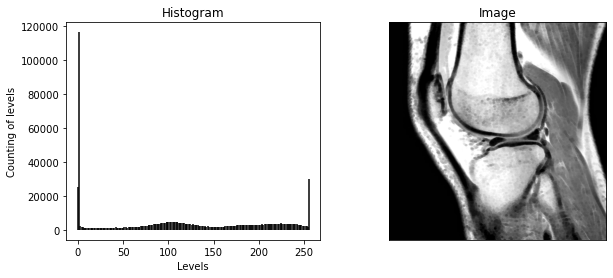

In [26]:
img_more_contrast = np.clip(img.astype(np.float32) * (1+0.4), 0, 255).astype(np.uint8) # increase contrast in 20%
_, _ = histogram(img_more_contrast)

O mesmo, só que reduzindo o contraste em 20% a menos:

Média = 50.07644375
Desvio padrão = 38.37188371031693


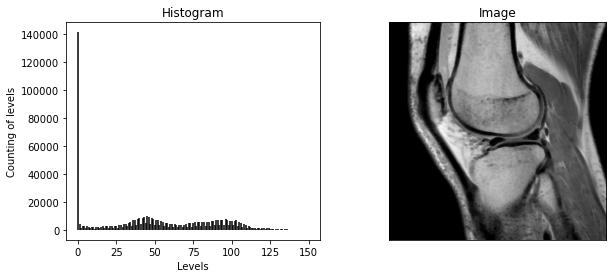

In [27]:
img_less_contrast = np.clip(img.astype(np.float32) * (1-0.4), 0, 255).astype(np.uint8) # decrease contrast in 20%
_, _ = histogram(img_less_contrast)

O aumento do contraste permitiu o detalhamento de regiões que o simples aumento de brilho não foi capaz de resolver. Já no caso da redução do contraste, a iamgem perde alguns detalhes e o seu histograma possui a tendência de espalhar a quantidade de níveis ao longo das cores.

## Equalização do histogram

Esta última seção busca mostrar os efeitos da equalização do histograma. A função abaixo auxilia na equalização do histograma.

In [65]:
def equalize_histogram(img):
    _, hist = np.unique(img.flatten(), return_counts=True) # histogram
    N, M = img.shape
    n = N*M
    csum = hist.cumsum()
    csum_norm = np.round(hist.cumsum()*255/n)-1
    csum_final = (csum_norm)/(csum_norm.max() - csum_norm.min())
    img_new = cumsum_norm.astype('uint8')[img.flatten()] # apply cumulative sum to image
    img_new = np.reshape(img_new, img.shape)
    #img_new = np.clip(cumsum_norm[img.astype(np.float32)], 0, 255).astype(np.uint8) # apply cumulative sum to image
    
    return img_new

In [77]:
def equalize_histogram(img):
    _, hist = np.unique(img.flatten(), return_counts=True) # histogram
    N, M = img.shape
    n = N*M
    csum = hist.cumsum()
    csumn = 255*csum/n
    img_new = csumn.astype('uint8')[img.flatten()] # apply cumulative sum to image
    img_new = np.reshape(img_new, img.shape)
    #img_new = np.clip(cumsum_norm[img.astype(np.float32)], 0, 255).astype(np.uint8) # apply cumulative sum to image
    
    return img_new

Assim, para observar os efeitos da equalização do histograma, basta executar o código da equalização para obter a nova imagem e, em seguida, executar no script do histograma.

Média = 131.8887015625
Desvio padrão = 68.10798226783193


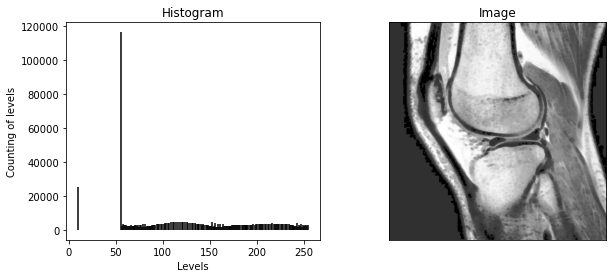

In [78]:
img_eq = equalize_histogram(img)
_, _ = histogram(img_eq)